## Make a pickled model using a simple model (cat or dog, intake health status, intake age)

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.learning_curve import learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression

/Users/courtney/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/courtney/anaconda3/lib/python3.6/site-packages/sklearn/learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


In [5]:
df = pd.read_csv('aac_intakes_outcomes.csv')

In [6]:
df.shape

(79672, 41)

In [7]:
df.columns

Index(['age_upon_outcome', 'animal_id_outcome', 'date_of_birth',
       'outcome_subtype', 'outcome_type', 'sex_upon_outcome',
       'age_upon_outcome_(days)', 'age_upon_outcome_(years)',
       'age_upon_outcome_age_group', 'outcome_datetime', 'outcome_month',
       'outcome_year', 'outcome_monthyear', 'outcome_weekday', 'outcome_hour',
       'outcome_number', 'dob_year', 'dob_month', 'dob_monthyear',
       'age_upon_intake', 'animal_id_intake', 'animal_type', 'breed', 'color',
       'found_location', 'intake_condition', 'intake_type', 'sex_upon_intake',
       'count', 'age_upon_intake_(days)', 'age_upon_intake_(years)',
       'age_upon_intake_age_group', 'intake_datetime', 'intake_month',
       'intake_year', 'intake_monthyear', 'intake_weekday', 'intake_hour',
       'intake_number', 'time_in_shelter', 'time_in_shelter_days'],
      dtype='object')

(array([ 39987.,  14926.,   5982.,   2873.,   2154.,   1744.,   1612.,
          1304.,   1208.,    998.]),
 array([  0.,   5.,  10.,  15.,  20.,  25.,  30.,  35.,  40.,  45.,  50.]),
 <a list of 10 Patch objects>)

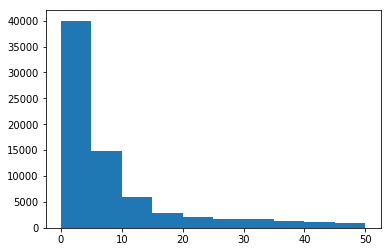

In [8]:
x = np.linspace(0, 50, 11)
plt.hist(df.time_in_shelter_days, bins = x)

In [9]:
df.breed.value_counts().size

2155

Is there a linear relationship between age on intake and time in the shelter

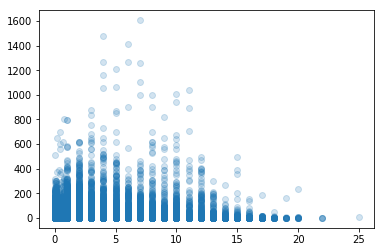

In [10]:
plt.scatter('age_upon_intake_(years)','time_in_shelter_days', data = df, alpha = 0.2)

In [11]:
df_continuous = df[['time_in_shelter_days','age_upon_outcome_(days)']]

In [12]:
df.color.value_counts()

Black/White                 8270
Black                       6673
Brown Tabby                 4471
Brown                       3598
White                       2835
Brown/White                 2516
Tan/White                   2462
Brown Tabby/White           2351
Orange Tabby                2182
White/Black                 2172
Blue/White                  2127
Tricolor                    2031
Tan                         2022
Black/Tan                   1847
Black/Brown                 1619
White/Brown                 1604
Brown Brindle/White         1374
Brown/Black                 1367
Tortie                      1344
Blue                        1335
Calico                      1333
White/Tan                   1195
Blue Tabby                  1136
Orange Tabby/White          1105
Red                         1047
Red/White                    858
Torbie                       845
Brown Brindle                728
Tan/Black                    637
Chocolate/White              614
          

In [13]:
df.outcome_type.value_counts()

Adoption           33594
Transfer           23799
Return to Owner    14791
Euthanasia          6244
Died                 690
Disposal             304
Rto-Adopt            179
Missing               46
Relocate              15
Name: outcome_type, dtype: int64

In [14]:
mask = (df.outcome_type.isin(['Adoption', 'Transfer', 'Return to Owner', 'Euthanasia']))
df_main_categories = df[mask]

In [15]:
species_mask = df_main_categories.animal_type.isin(['Dog', 'Cat'])
data = df_main_categories[species_mask]

In [16]:
data.intake_condition.value_counts()

Normal      66454
Injured      3185
Sick         2090
Nursing      1793
Aged          309
Other         141
Feral          91
Pregnant       46
Name: intake_condition, dtype: int64

In [17]:
intake_status = pd.DataFrame(np.where(data.intake_condition == 'Normal', 0, 1))
intake_status.columns = ['intake_status']

In [18]:
happy = pd.DataFrame(np.where(data.outcome_type.isin(['Adoption', 'Return to Owner']), 1, 0))
happy.columns = ['happy_outcome']

In [19]:
data.animal_type.value_counts()

Dog    45053
Cat    29056
Name: animal_type, dtype: int64

In [20]:
species_dummies = pd.get_dummies(data.animal_type)

In [21]:
data.columns = ['age_upon_outcome', 'animal_id_outcome', 'date_of_birth',
       'outcome_subtype', 'outcome_type', 'sex_upon_outcome',
       'age_upon_outcome_(days)', 'age_upon_outcome_(years)',
       'age_upon_outcome_age_group', 'outcome_datetime', 'outcome_month',
       'outcome_year', 'outcome_monthyear', 'outcome_weekday', 'outcome_hour',
       'outcome_number', 'dob_year', 'dob_month', 'dob_monthyear',
       'age_upon_intake', 'animal_id_intake', 'animal_type', 'breed', 'color',
       'found_location', 'intake_condition', 'intake_type', 'sex_upon_intake',
       'count', 'age_upon_intake_days', 'age_upon_intake_years',
       'age_upon_intake_age_group', 'intake_datetime', 'intake_month',
       'intake_year', 'intake_monthyear', 'intake_weekday', 'intake_hour',
       'intake_number', 'time_in_shelter', 'time_in_shelter_days']

In [22]:
data_basic = species_dummies.join(data.age_upon_intake_days)

In [23]:
data_outcome = data_basic.join(intake_status)

In [24]:
outcome = pd.get_dummies(data.outcome_type)

In [25]:
data_model = data_outcome.join(outcome)

In [26]:
data_log = data_model.join(happy)

In [27]:
data_log.happy_outcome.value_counts()

1.0    44766
0.0    24265
Name: happy_outcome, dtype: int64

In [28]:
data_log.head()

,Cat,Dog,age_upon_intake_days,intake_status,Adoption,Euthanasia,Return to Owner,Transfer,happy_outcome
0,0,1,3650,0.0,0,0,1,0,1.0
1,0,1,2555,0.0,0,0,1,0,1.0
2,0,1,2190,0.0,0,0,1,0,1.0
3,0,1,3650,0.0,0,0,0,1,0.0
4,0,1,5840,1.0,0,0,1,0,1.0


In [29]:
X1 = data_model[['Cat', 'Dog', 'age_upon_intake_days']]
y1 = data_model[['Adoption', 'Euthanasia', 'Return to Owner', 'Transfer']]
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.30, random_state=4444)

k_range = list(range(1, 21))
k_score = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    test_score = accuracy_score(y_test, y_pred)
    k_score.append(test_score)

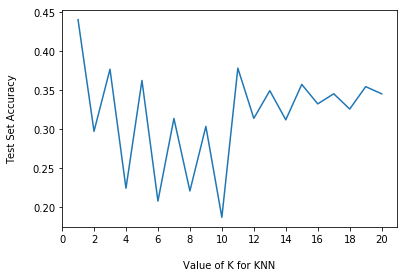

In [30]:
x_ticks = np.linspace(0,20,11)
plt.plot(k_range, k_score)
plt.xticks(x_ticks)
plt.xlabel('\nValue of K for KNN')
plt.ylabel('Test Set Accuracy\n');

In [31]:
data_no_na = data_log.dropna()

In [32]:
X1 = data_no_na[['Cat', 'Dog', 'age_upon_intake_days', 'intake_status']]
y1 = data_no_na[['Adoption', 'Euthanasia', 'Return to Owner', 'Transfer']]
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.30, random_state=4444)

k_range = list(range(1, 21))
k_score = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    test_score = accuracy_score(y_test, y_pred)
    k_score.append(test_score)

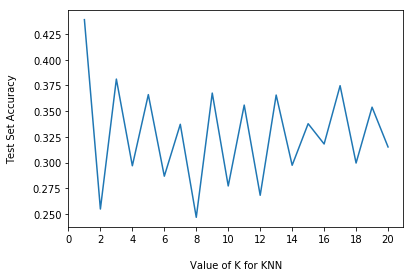

In [33]:
x_ticks = np.linspace(0,20,11)
plt.plot(k_range, k_score)
plt.xticks(x_ticks)
plt.xlabel('\nValue of K for KNN')
plt.ylabel('Test Set Accuracy\n');

In [35]:
X1 = data_no_na[['Cat', 'Dog', 'age_upon_intake_days', 'intake_status']]
y1 = data_no_na.happy_outcome
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.30, random_state=4444)

lm = LogisticRegression()
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)
log_reg_acc = accuracy_score(y_test, y_pred)
print(log_reg_acc)

0.671656204732


In [ ]:
print('\nLogistic Regression Error Metrics\n')
print('Accuracy:', log_reg_acc)
print('Precision:', precision_score(y_test, y_pred))
print('F1:', f1_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))

In [ ]:
pickle.dump(lm, open("logistic_model.p", "wb"))